## ### Synthetic Data Generation: Generate synthetic data using the make_blobs function from scikit-learn for testing purposes. 

In [103]:
# Import the required modules
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix, f1_score, accuracy_score
import seaborn as sns

import matplotlib.pyplot as plt

# ##### Data Manipulation 

In [104]:
# Read the usage_stats.csv file from the Resources folder into a Pandas DataFrame
GeneticDisorder_df = pd.read_csv(
    Path(r"Resources\train.csv")
)

# Display the first and last few rows of the DataFrame
display(GeneticDisorder_df.head())
display(GeneticDisorder_df.tail())

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome
22082,PID0x9332,11.0,Yes,No,No,No,4.738067,Andrew,Mose,Eban,...,Singular,11.188371,normal,1.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [105]:
# Display column names and data types
GeneticDisorder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

# ###### Handling Missing Data

In [106]:
# Replace '-' with 'Not applicable' in the entire DataFrame
GeneticDisorder_df = GeneticDisorder_df.copy()
GeneticDisorder_df.replace('-', 'Not applicable', inplace=True)

In [107]:
# Assuming that no data entries in the Genetic Disorder & Disorder Subclass represent no genetic disorder present in the patient
GeneticDisorder_df['Genetic Disorder'].fillna('Not Present', inplace=True)
GeneticDisorder_df['Disorder Subclass'].fillna('Not Present', inplace=True)


In [108]:
# Replace 'Genetic Disorder' column blanks based on 'Disorder subclass' column values

# Create a mapping dictionary for each condition
condition_mapping = {
    'Cystic Fibrosis': 'Single-gene inheritance diseases',
    'Tay-Sachs': 'Single-gene inheritance diseases',
    'Hemochromatosis': 'Single-gene inheritance diseases',
    'Diabetes': 'Multifactorial genetic inheritance disorders',
    'Cancer': 'Multifactorial genetic inheritance disorders',
    "Alzheimer's": 'Multifactorial genetic inheritance disorders',
    "Leber's hereditary optic neuropathy": 'Mitochondrial genetic inheritance disorders',
    'Leigh syndrome': 'Mitochondrial genetic inheritance disorders',
    'Mitochondrial myopathy': 'Mitochondrial genetic inheritance disorders'
}

# Replace blanks in 'Genetic Disorder' column based on conditions
GeneticDisorder_df['Genetic Disorder'] = GeneticDisorder_df.apply(lambda row: condition_mapping.get(row['Disorder Subclass'], row['Genetic Disorder']), axis=1)

In [109]:
# create a new column named 'Genetic Disorder Present' based on certain conditions.If the 'Genetic Disorder' is in the list of specific categories, the value in the new column is set to 'Yes';
# otherwise, it is set to 'No'.
GeneticDisorder_df['Genetic Disorder Present'] = np.where(
    GeneticDisorder_df['Genetic Disorder'].isin(['Single-gene inheritance diseases', 'Multifactorial genetic inheritance disorders', 'Mitochondrial genetic inheritance disorders']),
    'Yes',
    'No'
)

In [110]:
# Drop unnecessary columns from the dataset
columns_to_remove = ['Patient Id', 'Patient First Name', 'Family Name', 'Father\'s name', 'Mother\'s age', 'Father\'s age', 'Institute Name', 'Location of Institute','Test 1','Test 2','Test 3','Test 4','Test 5','Symptom 1','Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5','Parental consent', 'Genetic Disorder', 'Disorder Subclass']
columns_to_remove_train = [col for col in columns_to_remove if col in GeneticDisorder_df.columns]
GeneticDisorder_cleaned_df = GeneticDisorder_df.drop(columns=columns_to_remove_train)

In [111]:
# Count the number of NaN values in each column
nan_counts = GeneticDisorder_cleaned_df.isna().sum()

# Display the results
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Follow-up                                           2166
Gender                                              2173
Birth asphyxia                                      2139
Autopsy shows birth defect (if applicable)          4392
Place of birth                                      2124
Folic acid details (peri-conceptional)              2117
H/O serious maternal illness                        2152
H/O radiation exposure (x-ray)                     

In [112]:
# Drop rows with missing values
GeneticDisorder_dropped_df = GeneticDisorder_cleaned_df.dropna()

In [113]:
# Confirm no NaN values are reflected
nan_counts_after_drop = GeneticDisorder_dropped_df.isna().sum()
print("\nNumber of NaN values in each column after dropping rows:")
print(nan_counts_after_drop)


Number of NaN values in each column after dropping rows:
Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Follow-up                                           0
Gender                                              0
Birth asphyxia                                      0
Autopsy shows birth defect (if applicable)          0
Place of birth                                      0
Folic acid details (peri-conceptional)              0
H/O serious maternal illness                        0
H/O radiation exposure (x-ray)                      0
H/O substance abuse     

In [114]:
# Confirm that are no duplicate rows
duplicate_count = GeneticDisorder_dropped_df.duplicated().sum()

print("Count of duplicate rows:", duplicate_count)

# X_train_no_duplicates = GeneticDisorder_dropped_df.drop_duplicates()

Count of duplicate rows: 0


In [115]:
# Replace '-' with 'Not applicable' in the entire DataFrame
GeneticDisorder_dropped_df = GeneticDisorder_dropped_df.copy()
GeneticDisorder_dropped_df.replace('-', 'Not applicable', inplace=True)


In [116]:
# Replace 'Not applicable' with 'No' in the entire DataFrame
# GeneticDisorder_dropped_df = GeneticDisorder_dropped_df.copy()
# GeneticDisorder_dropped_df.replace('Not applicable', 'No', inplace=True)

In [117]:
# Display cleaned DataFrame
display(GeneticDisorder_dropped_df.head())
display(GeneticDisorder_dropped_df.tail())

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,...,H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Genetic Disorder Present
8,11.0,No,No,Yes,No,5.209058,Alive,Tachypnea,Tachycardia,Low,...,Yes,No,No,No,Yes,0.0,Multiple,6.669552,slightly abnormal,Yes
9,4.0,No,Yes,Yes,Yes,4.752272,Alive,Tachypnea,Tachycardia,Low,...,No,No,No,Yes,Yes,1.0,Multiple,6.397702,abnormal,Yes
14,6.0,Yes,No,Yes,No,4.620420,Alive,Tachypnea,Tachycardia,High,...,Yes,Yes,Not applicable,No,No,3.0,Multiple,3.000000,slightly abnormal,Yes
18,10.0,Yes,Yes,Yes,No,4.751452,Deceased,Normal (30-60),Tachycardia,Low,...,No,Yes,No,Yes,Yes,3.0,Singular,9.382407,abnormal,Yes
19,6.0,No,Yes,Yes,Yes,4.876896,Deceased,Tachypnea,Normal,Low,...,Yes,No,No,Yes,No,1.0,Singular,7.370477,normal,Yes


,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,...,H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Genetic Disorder Present
22066,13.0,No,Yes,No,Yes,4.777036,Alive,Normal (30-60),Normal,High,...,Yes,No,Not applicable,No,Yes,1.0,Singular,3.000736,normal,Yes
22068,4.0,Yes,No,No,No,5.077554,Deceased,Normal (30-60),Normal,Low,...,Yes,No,Not applicable,No,No,1.0,Singular,9.566549,inconclusive,Yes
22076,0.0,Yes,No,Yes,No,4.931758,Alive,Normal (30-60),Tachycardia,Low,...,No,Not applicable,No,Yes,Yes,1.0,Singular,11.649052,abnormal,Yes
22079,8.0,No,Yes,No,Yes,4.974220,Alive,Normal (30-60),Normal,High,...,Yes,No,Not applicable,Yes,No,2.0,Multiple,7.041556,inconclusive,Yes
22081,7.0,Yes,No,Yes,Yes,4.858543,Alive,Tachypnea,Tachycardia,High,...,Yes,Not applicable,Yes,Yes,No,1.0,Multiple,8.437670,abnormal,Yes


In [118]:
# Export cleaned CSV data
GeneticDisorder_dropped_df.to_csv('Resources/genetic_disorder.csv', index=False)

# ### Logistic Regression Model

In [119]:
# Split the data into X (features) and y (target)
# The y variable should focus on the target column
y = ['Genetic Disorder Present']

# The X variable should include all features except the target
X = GeneticDisorder_dropped_df.drop(columns=['Genetic Disorder Present'])

In [120]:
# Identify categorical columns and perform one-hot encoding only on features
categorical_columns = X.select_dtypes(include=['object']).columns
GeneticDisorder_encoded_df = pd.get_dummies(X, columns=categorical_columns, drop_first=True)


In [121]:
# Display encoded DataFrame
GeneticDisorder_encoded_df

,Patient Age,Blood cell count (mcL),No. of previous abortion,White Blood cell count (thousand per microliter),Genes in mother's side_Yes,Inherited from father_Yes,Maternal gene_Yes,Paternal gene_Yes,Status_Deceased,Respiratory Rate (breaths/min)_Tachypnea,...,H/O radiation exposure (x-ray)_Not applicable,H/O radiation exposure (x-ray)_Yes,H/O substance abuse_Not applicable,H/O substance abuse_Yes,Assisted conception IVF/ART_Yes,History of anomalies in previous pregnancies_Yes,Birth defects_Singular,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal
8,11.0,5.209058,0.0,6.669552,False,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,True
9,4.0,4.752272,1.0,6.397702,False,True,True,True,False,True,...,False,False,False,False,True,True,False,False,False,False
14,6.0,4.620420,3.0,3.000000,True,False,True,False,False,True,...,False,True,True,False,False,False,False,False,False,True
18,10.0,4.751452,3.0,9.382407,True,True,True,False,True,False,...,False,True,False,False,True,True,True,False,False,False
19,6.0,4.876896,1.0,7.370477,False,True,True,True,True,True,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22066,13.0,4.777036,1.0,3.000736,False,True,False,True,False,False,...,False,False,True,False,False,True,True,False,True,False
22068,4.0,5.077554,1.0,9.566549,True,False,False,False,True,False,...,False,False,True,False,False,False,True,True,False,False
22076,0.0,4.931758,1.0,11.649052,True,False,True,False,False,False,...,True,False,False,False,True,True,True,False,False,False
22079,8.0,4.974220,2.0,7.041556,False,True,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False


In [122]:
# Export encoded CSV data
GeneticDisorder_encoded_df.to_csv('Resources/genetic_disorder_encoded.csv', index=False)

In [123]:
# Remove everything after the underscore for all columns
# GeneticDisorder_encoded_df.columns = GeneticDisorder_encoded_df.columns.str.split('_').str.get(0)

In [124]:
# Generate synthetic data for testing
X, y = make_blobs(n_samples=1000, n_features=24, centers=2, random_state=1, cluster_std=2)

# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [125]:
# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=9)

# Fit and save the logistic regression model using the data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [126]:
#Generate training predictions
GDtraining_predictions = lr_model.predict(X_train)

#Generate testing predictions
GDtesting_predictions = logistic_regression_model.predict(X_test)

In [127]:
# Create and save the confusion matrix for the training data
GDtraining_matrix = confusion_matrix(y_train, GDtraining_predictions)

# Print the confusion matrix for the training data
print("Confusion Matrix for Logistic Regression model:")
print(GDtraining_matrix)

Confusion Matrix for Logistic Regression model:
[[375   0]
 [  0 375]]


In [128]:
# Create and save the confusion matrix for the testing data
GDtesting_matrix = confusion_matrix(y_test, GDtesting_predictions)

# Print the confusion matrix for the testing data
print("Confusion Matrix for Logistic Regression model:")
print(GDtesting_matrix)

Confusion Matrix for Logistic Regression model:
[[125   0]
 [  0 125]]


In [129]:
# Create and save the training classification report
GDtraining_report = classification_report(y_train, GDtraining_predictions, target_names=['Not Present (0)', 'Present (1)'])

# Print the training classification report
print("Training Classification Report for Logistic Regression model:")
print(GDtraining_report)

Training Classification Report for Logistic Regression model:
                 precision    recall  f1-score   support

Not Present (0)       1.00      1.00      1.00       375
    Present (1)       1.00      1.00      1.00       375

       accuracy                           1.00       750
      macro avg       1.00      1.00      1.00       750
   weighted avg       1.00      1.00      1.00       750



In [130]:
# Create and save the testing classification report
GDtesting_report = classification_report(y_test, GDtesting_predictions, target_names=['Not Present (0)', 'Present (1)'])

# Print the testing classification report
print("Testing Classification Report for Logistic Regression model:")
print(GDtesting_report)

Testing Classification Report for Logistic Regression model:
                 precision    recall  f1-score   support

Not Present (0)       1.00      1.00      1.00       125
    Present (1)       1.00      1.00      1.00       125

       accuracy                           1.00       250
      macro avg       1.00      1.00      1.00       250
   weighted avg       1.00      1.00      1.00       250



In [131]:
# Print the balanced_accuracy score of the model
print(f"The balanced_accuracy score of the model: {balanced_accuracy_score(y_test, GDtesting_predictions)}")

The balanced_accuracy score of the model: 1.0


# ### Predictions Using Logistic Regression Model

In [132]:
# Predict outcomes for test data set using the existing logistic regression model
GDtesting_predictions = lr_model.predict(X_test)

# Create a DataFrame with predictions and actual values
predictions_df = pd.DataFrame({"Prediction": GDtesting_predictions, "Actual": y_test})
print(predictions_df)


     Prediction  Actual
0             1       1
1             0       0
2             1       1
3             1       1
4             0       0
..          ...     ...
245           0       0
246           0       0
247           1       1
248           1       1
249           0       0

[250 rows x 2 columns]


# ### Visual Representation of Logistic Regression Model

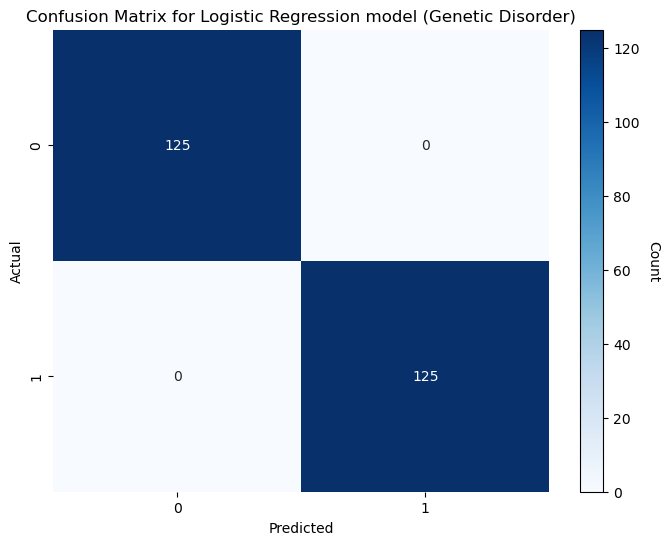

In [133]:
# Confusion Matrix Heatmap for Logistic Regression model
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(GDtesting_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression model (Genetic Disorder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add legend
cbar = heatmap.figure.colorbar(heatmap.collections[0])
cbar.set_label('Count', rotation=270, labelpad=15)

plt.show()

# The confusion matrix heatmap allows users to visually assess how well the Logistic Regression model \
# is performing in predicting the "Genetic Disorder" by comparing the predicted and actual classes. The goal is \
# to have higher counts along the diagonal (from the top left to the bottom right), indicating correct predictions, and \
# lower counts in off-diagonal cells, indicating misclassifications. The color intensity provides a quick visual summary \
# of the distribution of predictions.

In [134]:
# Using the trained Logistic Regression model
coefficients = lr_model.coef_[0]

# Get the names of all features
all_feature_names = GeneticDisorder_encoded_df.columns

# Create a DataFrame to display feature names and their coefficients
feature_coefficients_df = pd.DataFrame({'Feature': all_feature_names[:len(coefficients)], 'Coefficient': coefficients})

# Display the DataFrame sorted by absolute coefficient values
feature_coefficients_df['Absolute Coefficient'] = feature_coefficients_df['Coefficient'].abs()
feature_coefficients_df = feature_coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top features and their coefficients
print(feature_coefficients_df)


# Coefficients indicate the strength and direction (positive or negative) of the relationship between each feature and the predicted outcome. \
# A negative coefficient suggests an inverse relationship between the feature and the predicted outcome. As "Patient Age" and "Blood cell count (mcL)" \
# have negative coefficients, an increase in these values is associated with a decrease in the predicted outcome (lower likelihood of a Genetic Disorder).
# Magnitude (Absolute Coefficient) of the coefficient indicates the strength of the relationship. Larger absolute values indicate a stronger influence on the predicted outcome.


                                              Feature  Coefficient  \
5                           Inherited from father_Yes     0.221216   
20         Folic acid details (peri-conceptional)_Yes    -0.205181   
19                           Place of birth_Institute     0.167921   
16                                 Birth asphyxia_Yes     0.165668   
22      H/O radiation exposure (x-ray)_Not applicable     0.162661   
8                                     Status_Deceased     0.158783   
12                                      Gender_Female     0.148021   
21                   H/O serious maternal illness_Yes    -0.145208   
0                                         Patient Age     0.136490   
23                 H/O radiation exposure (x-ray)_Yes    -0.108522   
11                                      Follow-up_Low    -0.103045   
3    White Blood cell count (thousand per microliter)    -0.078282   
10                  Heart Rate (rates/min_Tachycardia     0.076828   
17  Autopsy shows bi

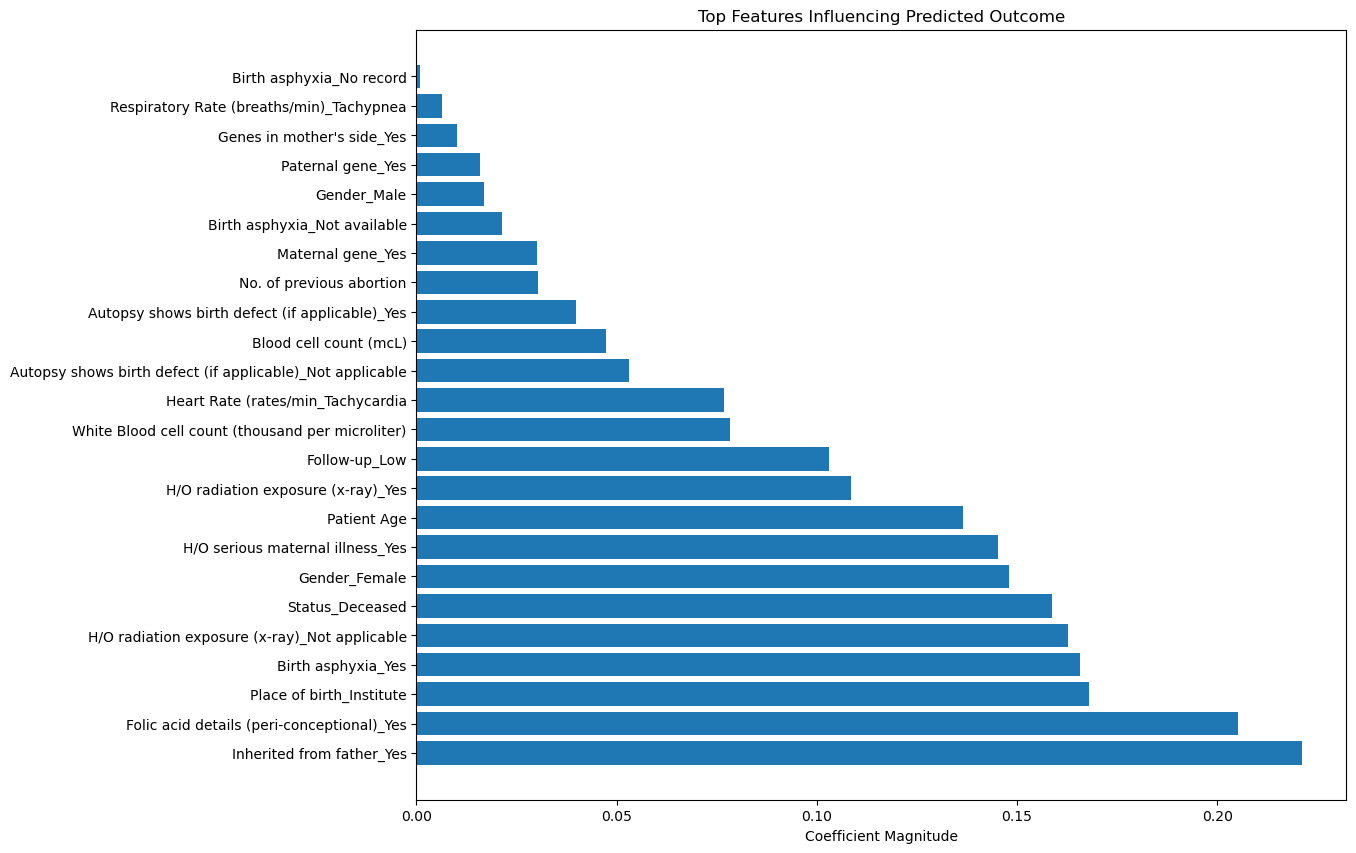

In [135]:
coefficients = lr_model.coef_[0]

# Get the absolute values of coefficients for feature importance
feature_importance = abs(coefficients)

# Get the names of all features
all_feature_names = GeneticDisorder_encoded_df.columns

# Get the indices of the top 20 features
top_25_indices = feature_importance.argsort()[-25:][::-1]

# Get the names and importance of the top 20 features
top_25_feature_names = all_feature_names[top_25_indices]
top_25_feature_importance = feature_importance[top_25_indices]

# Plot the top 20 features and their importance
plt.figure(figsize=(12, 10))
plt.barh(top_25_feature_names, top_25_feature_importance)
plt.xlabel('Coefficient Magnitude')
plt.title('Top Features Influencing Predicted Outcome')
plt.show()

# This graph helps users identify and prioritize the most influential features for the logistic regression model. \
# "Coefficient Magnitude" is a measure of how much a feature contributes to the model's predictions, considering both \
# the positive and negative impacts. Larger magnitudes indicate features that have a more substantial influence on the predicted outcome.

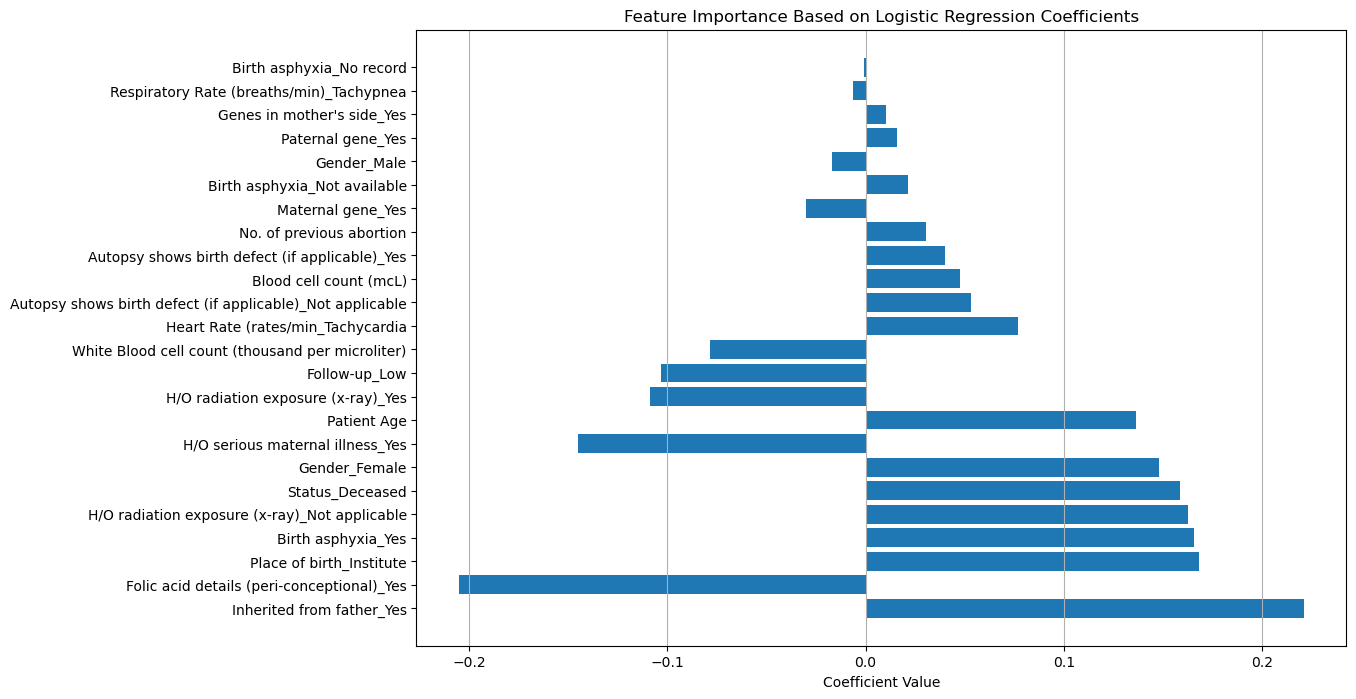

In [136]:
# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_coefficients_df['Feature'], feature_coefficients_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance Based on Logistic Regression Coefficients')
plt.grid(axis='x')
plt.show()

# The graph shows the contribution of each feature to the logistic regression model's predictions \
# The length of each bar represents the magnitude of the coefficient for a specific feature. Larger magnitudes \
# (positive or negative) indicate a stronger impact on the predicted outcome.  The direction of the bar (to the right or left of the centerline) \
# indicates the direction of the impact. If the bar is to the right, it suggests a positive impact on the predicted outcome, while a bar to the left suggests a negative impact. \
# Positive coefficients suggest that an increase in the corresponding feature value makes the prediction more likely to be in class 1 ("Present" in this case), while negative coefficients suggest the opposite.